In [1]:
# Lbraries for data analysis, handling, and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Scikit-learn library utilities and models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint

In [3]:
# Warning cancellations during data imports
import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading dataset from syste file for analysis
dataset = pd.read_csv("C:/Users/Enzo/Downloads/Wine Quality/WineQuality.csv")

In [5]:
dataset.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [7]:
dataset.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
# To begin the analysis of the data
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
# Noting the counts of each type of wine in the production line

unique_counts = dataset['Type'].value_counts()
df_unique_counts = pd.DataFrame(unique_counts).reset_index()
df_unique_counts.columns = ['Type', 'Count']
df_unique_counts['Percentage'] = (df_unique_counts['Count'] / df_unique_counts['Count'].sum()) * 100
df_unique_counts

,Type,Count,Percentage
0,White Wine,24453,75.274742
1,Red Wine,8032,24.725258


In [10]:
# To note the quality in uniqueness of the wine produced
dataset['quality'].unique()

array([6, 5, 7, 4, 8, 3, 9], dtype=int64)

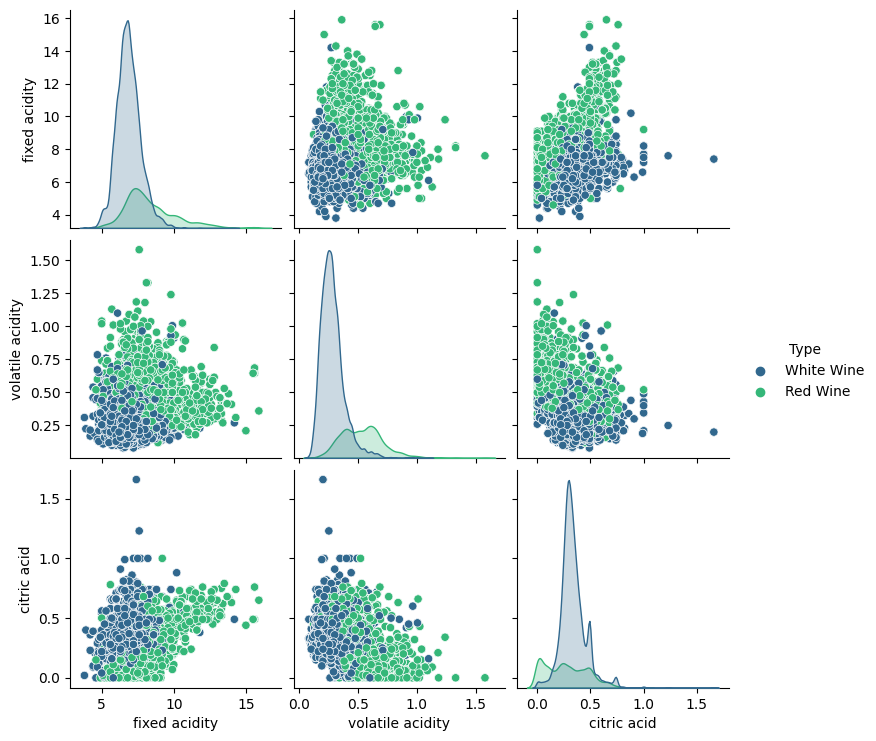

In [11]:
# Using seaborn, we can visualize the acidity levels in the wines through their types
sns.pairplot(dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'Type']], hue='Type', palette='viridis')
plt.show()

In [12]:
# Prepare the data for modellng and accuracy testing
features = dataset.drop('Type', axis=1)
targets = dataset['Type']
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, targets, random_state=42)

# Clearly show the hyperparameters grid
param_dist = {
    'n_neighbors': randint(1, 101),
    'p': [1, 2],
    'weights': ["uniform", "distance"],
}

# Create a Classifier (in this case, we will use a KNN type)
knn = KNeighborsClassifier()

# Create the RandomizedSearchCV object for parameter distributions
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5)

# Fit the model to the training data for testing
random_search.fit(training_features, training_target)

# Print the best parameters and the corresponding score
print("Best Hyperparameters::\n{}".format(random_search.best_params_))
print("\nHighest Cross Validation Score::{}".format(random_search.best_score_))

# Make predictions on the testing data using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(testing_features)

# Calculate the accuracy of the best model
accuracy = accuracy_score(testing_target, predictions)

Best Hyperparameters::
{'n_neighbors': 42, 'p': 1, 'weights': 'distance'}

Highest Cross Validation Score::0.9977835208044595


In [13]:
# We then output the accuracy score from the test
print(f"\nBest model accuracy on the testing set: {accuracy}")


Best model accuracy on the testing set: 0.9997537552327013


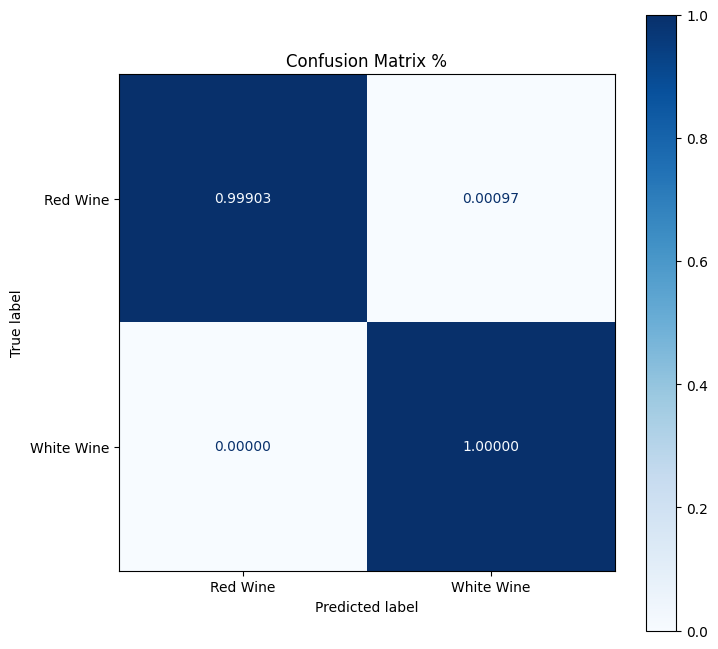

In [14]:
# To show the comparison between the predictive measure and the true measure of accuracy in the wine production,
# we can creat a confusion matrix using the matplotlib.pyplot library.

# Compute the confusion matrix
cm = confusion_matrix(testing_target, predictions)

# Apply normalization to the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, 
                              display_labels=best_model.classes_)

# Plot and visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', values_format=".5f")
plt.title('Confusion Matrix %')
plt.show()

In [15]:
# After viewing our accuracy points and visualizing our confusion matrix for accuracy percentages of production predictions,
# we now have to model the dataset in a way that we can predict the quality of the wine after production in relation to
# the accuracy calculations we had in cell 18.

# One-hot encode the categorical feature - Type
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(dataset[['Type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Type']))

dataset = pd.concat([dataset.drop('Type', axis=1), encoded_df], axis=1)

In [16]:
# Fragment the dataset into features and targets
features = dataset.drop('quality', axis=1)
targets = dataset['quality']

# Fragment the dataset into training and testing sets
training_features, testing_features, training_target, testing_target = train_test_split(features, targets, random_state=42)

# Clearly show the hyperparameters grid
param_dist = {
    'n_neighbors': randint(1, 101),
    'p': [1, 2],
    'weights': ["uniform", "distance"],
}

# Create a Classifier (in this case, we will use a KNN type)
knn = KNeighborsClassifier()

# Create the RandomizedSearchCV object for parameter distributions
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5)

# Fit the model to the training dataset
random_search.fit(training_features, training_target)

# Print the best parameters and the corresponding score
print("Best Hyperparameters::\n{}".format(random_search.best_params_))
print("\nHighest Cross Validation Score::{}".format(random_search.best_score_))

# Make predictions on the testing data using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(testing_features)

# Calculate the accuracy of the best model
accuracy = accuracy_score(testing_target, predictions)
print("\nTesting Accuracy::{}".format(accuracy))

Best Hyperparameters::
{'n_neighbors': 53, 'p': 1, 'weights': 'distance'}

Highest Cross Validation Score::0.9826786923151832

Testing Accuracy::0.9906426988426495


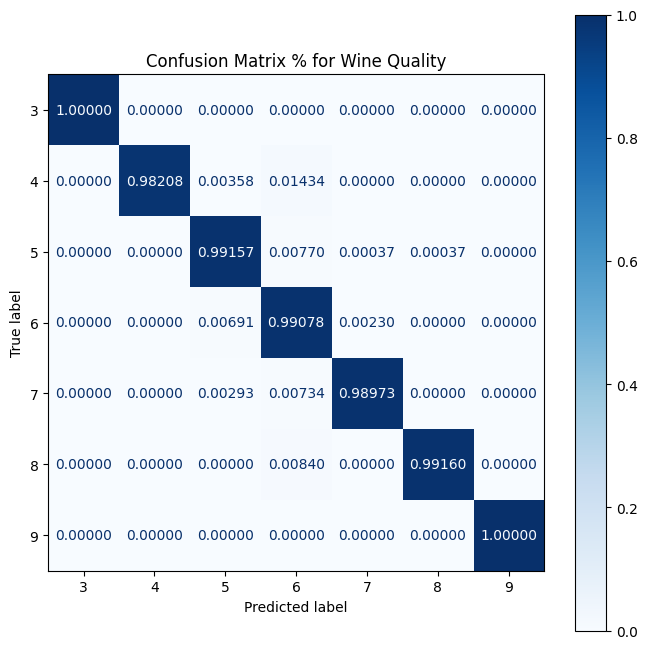

In [17]:
# To show the comparison between the predictive measure and the true measure of accuracy in the wine quality,
# we can creat a confusion matrix using the matplotlib.pyplot library.

# Compute the confusion matrix
cm = confusion_matrix(testing_target, predictions)

# Apply normalization to the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, 
                              display_labels=best_model.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', values_format=".5f")
plt.title('Confusion Matrix % for Wine Quality')
plt.show()